In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Copy of ground_truth.csv")
df

,annotation_id,attributes,cx,cy,image,label,line,occluded,points,rotation,...,type,z_order,image_location,thumbnail,combined_image_info,pass_fail,criteria,Stage,missing_polyline,debug_data
0,3d777356223eceeb5b7867d9a1ea4cd7a64ed9c48704e2...,"{""Lens Off Image"": ""Yes, +5% Arc Length"", ""Bub...",NaN,NaN,Q3/TAM07-Q3-0121_212725_480_RT180.bmp,Edge-Obstructed,merged_annotations_MINUS-TAM07-Q3-20250509.xml,NaN,NaN,NaN,...,tag,NaN,NaN,NaN,NaN,Pass,"edge-obstructed: flag=Yes, +5% Arc Length, arc...",1,No,"{""Lens Off Image"": ""Yes, +5% Arc Length"", ""Bub..."
1,676c505c9585d76a869924824acfddaa5fa55fadea9124...,"{""% Arc Length"": ""+50%""}",NaN,NaN,Q3/TAM07-Q3-0121_212725_480_RT180.bmp,Edge-Out-of-Focus,merged_annotations_MINUS-TAM07-Q3-20250509.xml,NaN,NaN,NaN,...,tag,NaN,NaN,NaN,NaN,Fail,edge-out-of-focus: arc_length_percent=50.0 >=50.0,1,Yes,"{""% Arc Length"": ""+50%""}"
2,677f486e8acaabaa535e2e9d5e4673c80f9463516e8057...,"{""% surface impacted"": ""50%""}",NaN,NaN,Q3/TAM07-Q3-0121_212725_480_RT180.bmp,Ripple,merged_annotations_MINUS-TAM07-Q3-20250509.xml,NaN,NaN,NaN,...,tag,NaN,NaN,NaN,NaN,Fail,ripple: surface_percent=50.0 >=50.0,1,Yes,"{""% surface impacted"": ""50%""}"
3,05afb1257a33fe07e53da125c0f12bca83591dfefc9be4...,"{""Lens Off Image"": ""Yes, +5% Arc Length"", ""Bub...",NaN,NaN,Q3/TAM07-Q3-0121_212725_480_RT270.bmp,Edge-Obstructed,merged_annotations_MINUS-TAM07-Q3-20250509.xml,NaN,NaN,NaN,...,tag,NaN,NaN,NaN,NaN,Pass,"edge-obstructed: flag=Yes, +5% Arc Length, arc...",1,No,"{""Lens Off Image"": ""Yes, +5% Arc Length"", ""Bub..."
4,9fbee5ce9a1c4ad01623867b8cb87b08941a3a7e215f67...,"{""% Arc Length"": ""+50%""}",NaN,NaN,Q3/TAM07-Q3-0121_212725_480_RT270.bmp,Edge-Out-of-Focus,merged_annotations_MINUS-TAM07-Q3-20250509.xml,NaN,NaN,NaN,...,tag,NaN,NaN,NaN,NaN,Fail,edge-out-of-focus: arc_length_percent=50.0 >=50.0,1,Yes,"{""% Arc Length"": ""+50%""}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515497,8dae2d94b334e9f846c0fa50b326f9594311a36ded8258...,"{""Edge Contact"": ""No"", ""Large"": ""No"", ""Bubble ...",805.15,658.17,C/TAM07-C-1029_175055_379.bmp,Bubble,merged_annotations_MINUS-TAM07-Q3-20250509.xml,0.0,NaN,0.0,...,ellipse,0.0,NaN,NaN,NaN,Pass,bubble: area%=0.0 <4.0,2,No,"{""Edge Contact"": ""No"", ""Large"": ""No"", ""Bubble ..."
515498,019aa45503d67746399156d9af729e864c7893a7565758...,"{""Edge Contact"": ""No"", ""Large"": ""No"", ""Bubble ...",790.10,664.64,C/TAM07-C-1029_175055_379.bmp,Bubble,merged_annotations_MINUS-TAM07-Q3-20250509.xml,0.0,NaN,0.0,...,ellipse,0.0,NaN,NaN,NaN,Pass,bubble: area%=0.0 <4.0,2,No,"{""Edge Contact"": ""No"", ""Large"": ""No"", ""Bubble ..."
515499,c9476dde474ec8f12d131f3cf8d00eceefa592272ce1f6...,"{""Edge Contact"": ""No"", ""Large"": ""No"", ""Bubble ...",790.55,660.81,C/TAM07-C-1029_175055_379.bmp,Bubble,merged_annotations_MINUS-TAM07-Q3-20250509.xml,0.0,NaN,0.0,...,ellipse,0.0,NaN,NaN,NaN,Pass,bubble: area%=0.0 <4.0,2,No,"{""Edge Contact"": ""No"", ""Large"": ""No"", ""Bubble ..."
515500,27b84021e4303fe5d108211408eb8f7a1b2ecbac7f604e...,"{""Edge Contact"": ""No"", ""Large"": ""No"", ""Bubble ...",797.90,627.20,C/TAM07-C-1029_175055_379.bmp,Bubble,merged_annotations_MINUS-TAM07-Q3-20250509.xml,0.0,NaN,0.0,...,ellipse,0.0,NaN,NaN,NaN,Pass,bubble: area%=0.0 <4.0,2,No,"{""Edge Contact"": ""No"", ""Large"": ""No"", ""Bubble ..."


# Pass Fail Grouped Bar Chart

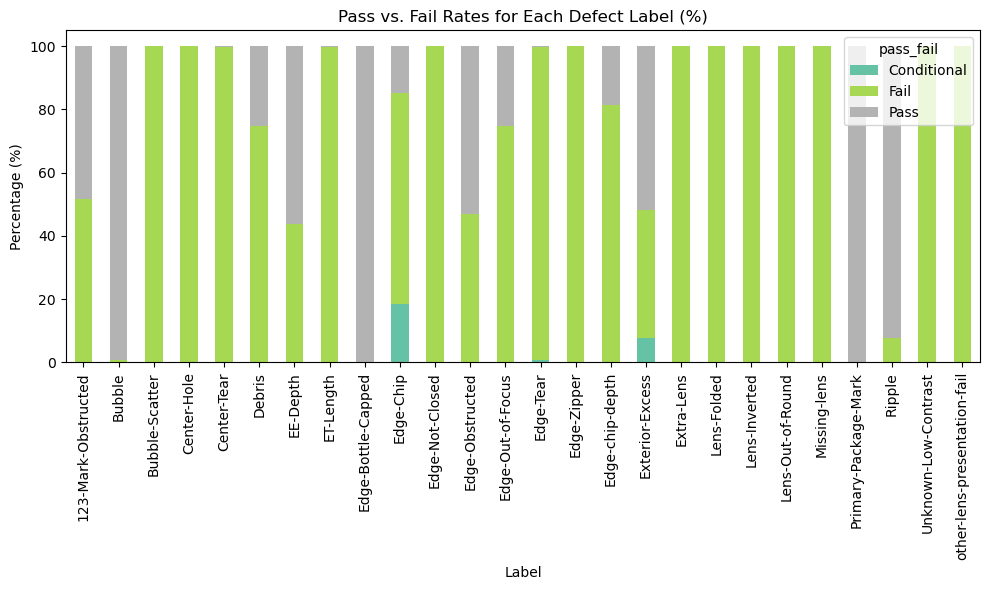

In [3]:
group = df.groupby(['label', 'pass_fail']).size().unstack(fill_value=0)


group_pct = group.div(group.sum(axis=1), axis=0) * 100
group_pct.plot(kind='bar', stacked=True, figsize=(10, 6), title="Pass vs. Fail Rates for Each Defect Label (%)", colormap='Set2')
plt.ylabel("Percentage (%)")
plt.xlabel('Label')
plt.tight_layout()
plt.show()

In [4]:
group = df.groupby(['label', 'pass_fail']).size().unstack(fill_value=0)

group_pct = group.div(group.sum(axis=1), axis=0) * 100


print("Pass/Fail Percentage by Label:\n")
print(group_pct.round(2))

Pass/Fail Percentage by Label:

pass_fail                     Conditional    Fail    Pass
label                                                    
123-Mark-Obstructed                  0.00   51.72   48.28
Bubble                               0.00    0.69   99.31
Bubble-Scatter                       0.00  100.00    0.00
Center-Hole                          0.00  100.00    0.00
Center-Tear                          0.00   99.63    0.37
Debris                               0.00   74.71   25.29
EE-Depth                             0.00   43.77   56.23
ET-Length                            0.00   99.82    0.18
Edge-Bottle-Capped                   0.00    0.00  100.00
Edge-Chip                           18.61   66.44   14.95
Edge-Not-Closed                      0.00  100.00    0.00
Edge-Obstructed                      0.00   47.07   52.93
Edge-Out-of-Focus                    0.00   74.66   25.34
Edge-Tear                            0.90   98.87    0.24
Edge-Zipper                          0.0

# Defect Frequency

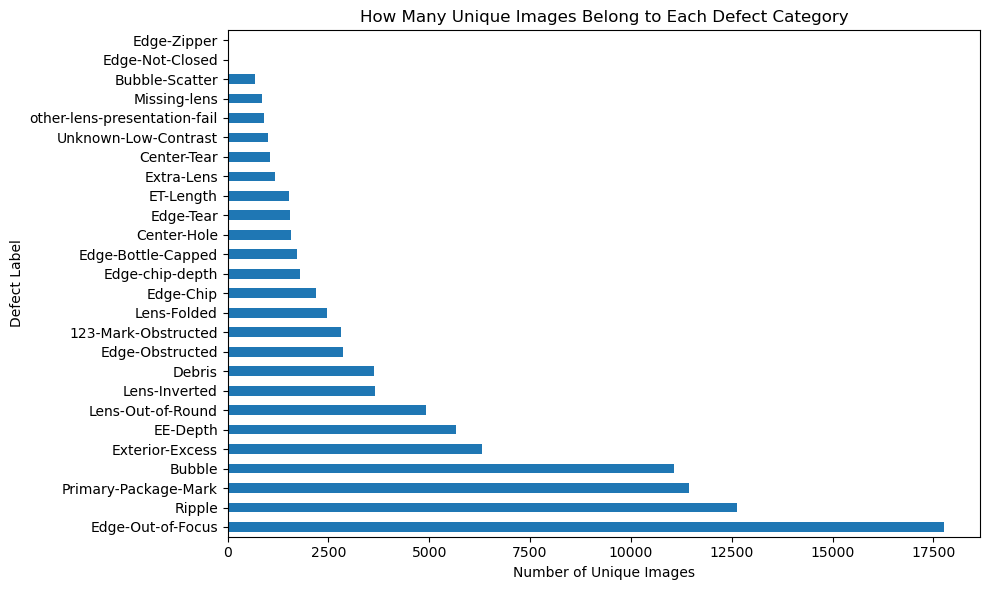

In [5]:

unique_labels = df.drop_duplicates(subset=['image', 'label'])


label_counts = unique_labels['label'].value_counts()

# Plot
label_counts.plot(kind='barh', figsize=(10, 6), title='How Many Unique Images Belong to Each Defect Category')
plt.xlabel("Number of Unique Images")
plt.ylabel('Defect Label')
plt.tight_layout()
plt.show()


This chart shows how many unique images contain each defect type.
Each image is only counted once per defect, even if it has multiple annotations of the same defect.
If an image has multiple different defects, it contributes to each of those categories.

<Axes: title={'center': 'Top 15 Most Frequent Defect Label Combinations per Image'}, ylabel='label'>

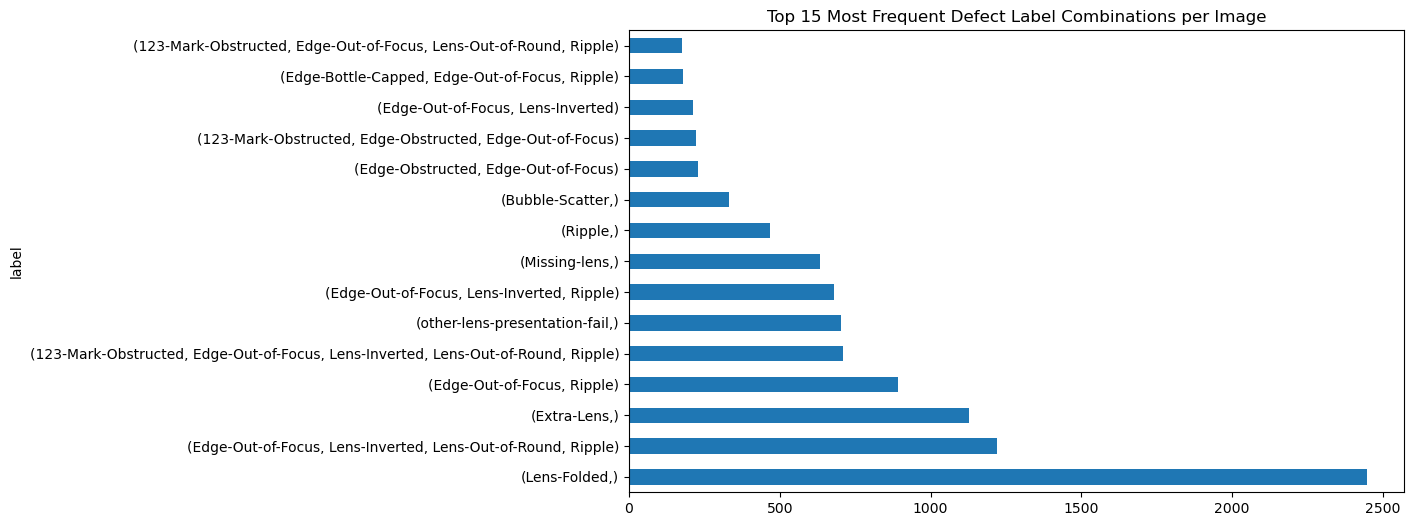

In [6]:
combo_counts = df.groupby('image')['label'].apply(lambda x: tuple(sorted(x))).value_counts()
combo_counts.head(15).plot(kind='barh', title="Top 15 Most Frequent Defect Label Combinations per Image", figsize=(10, 6))


# Normalization of the data

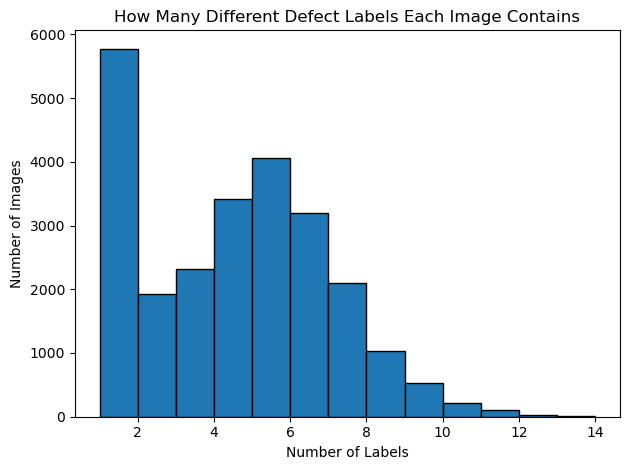

In [7]:
labels_per_image = df.groupby('image')['label'].nunique()
labels_per_image.plot(kind='hist', bins=range(1, labels_per_image.max()+2), edgecolor='black')
plt.title("How Many Different Defect Labels Each Image Contains")
plt.xlabel('Number of Labels')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()


This chart shows how many images have 1, 2, 3, or more different defect types.
It helps us understand whether most images have a single defect or multiple defects.

# Batch Overview

In [8]:
unique_images = df['image'].drop_duplicates().reset_index(drop=True)
unique_images


0        Q3/TAM07-Q3-0121_212725_480_RT180.bmp
1        Q3/TAM07-Q3-0121_212725_480_RT270.bmp
2         Q3/TAM07-Q3-0121_212725_480_RT90.bmp
3         Q3/TAM07-Q3-0121_220412_533_FLPx.bmp
4         Q3/TAM07-Q3-0121_220412_533_FLPy.bmp
                         ...                  
24699            C/TAM07-C-1029_042509_572.bmp
24700            C/TAM07-C-1029_043126_862.bmp
24701            C/TAM07-C-1029_043338_102.bmp
24702            C/TAM07-C-1029_172333_147.bmp
24703            C/TAM07-C-1029_175055_379.bmp
Name: image, Length: 24704, dtype: object

In [9]:
unique_df = df.drop_duplicates(subset='image').copy()
unique_df['batch_id'] = unique_df['image'].str.extract(r'^([^/]+)/')

print("Number of unique batch IDs:", unique_df['batch_id'].nunique())
print(unique_df['batch_id'].unique())


Number of unique batch IDs: 20
['Q3' 'Q4' 'R3' 'R4' 'S3' 'S4' 'T3' 'T4' 'U3' 'U4' 'V3' 'V4' 'W3' 'W4'
 'X3' 'X4' 'A' 'B' 'C' 'H']


In [10]:
batch_group = unique_df.groupby(['batch_id', 'pass_fail']).size().unstack(fill_value=0)

batch_group['fail_rate_%'] = 100 * batch_group['Fail'] / (batch_group['Pass'] + batch_group['Fail'])

batch_group_sorted = batch_group.sort_values(by='fail_rate_%', ascending=False)

print(batch_group_sorted[['Pass', 'Fail', 'fail_rate_%']])


pass_fail  Pass  Fail  fail_rate_%
batch_id                          
S4           64   492    88.489209
W4           62   400    86.580087
X4          124   747    85.763490
U4          103   571    84.718101
V4          304  1494    83.092325
T4          366  1489    80.269542
T3           22    79    78.217822
R4          471  1675    78.052190
R3           68   214    75.886525
V3           47   139    74.731183
X3           29    79    73.148148
U3           28    76    73.076923
S3           60   151    71.563981
Q4          837  2087    71.374829
Q3           42    99    70.212766
W3           28    60    68.181818
C          2101  1966    48.340300
A          2037  1854    47.648419
B          1760  1380    43.949045
H           780   308    28.308824


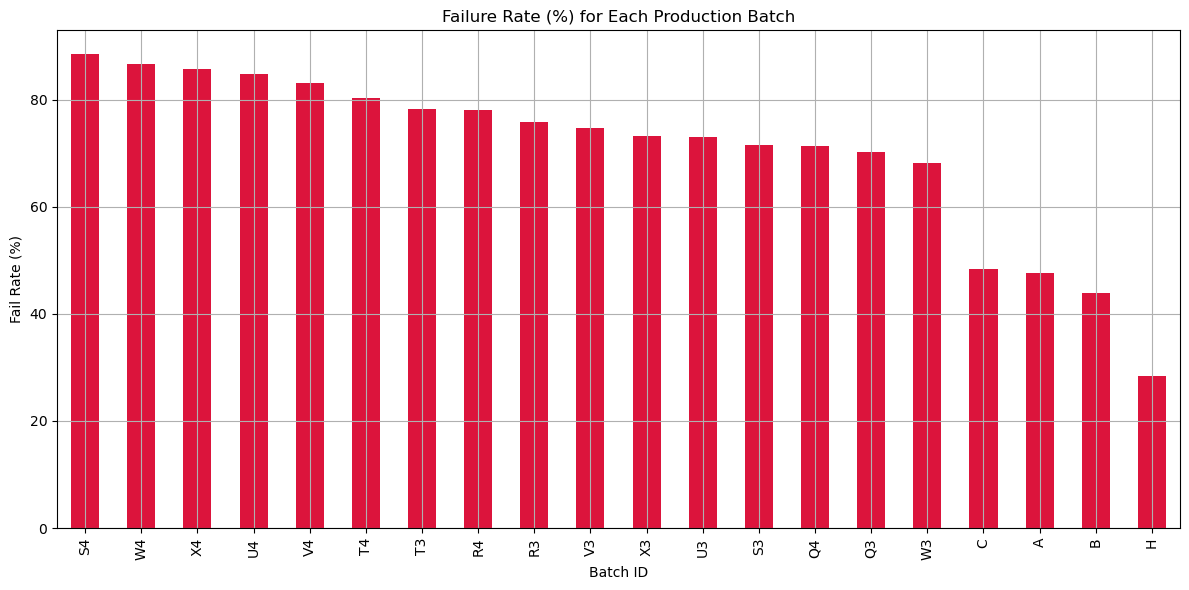

In [11]:
batch_group_sorted['fail_rate_%'].plot(
    kind='bar',
    figsize=(12, 6),
    title="Failure Rate (%) for Each Production Batch",
    ylabel='Fail Rate (%)',
    xlabel='Batch ID',
    color='crimson',
    grid=True
)
plt.tight_layout()
plt.show()


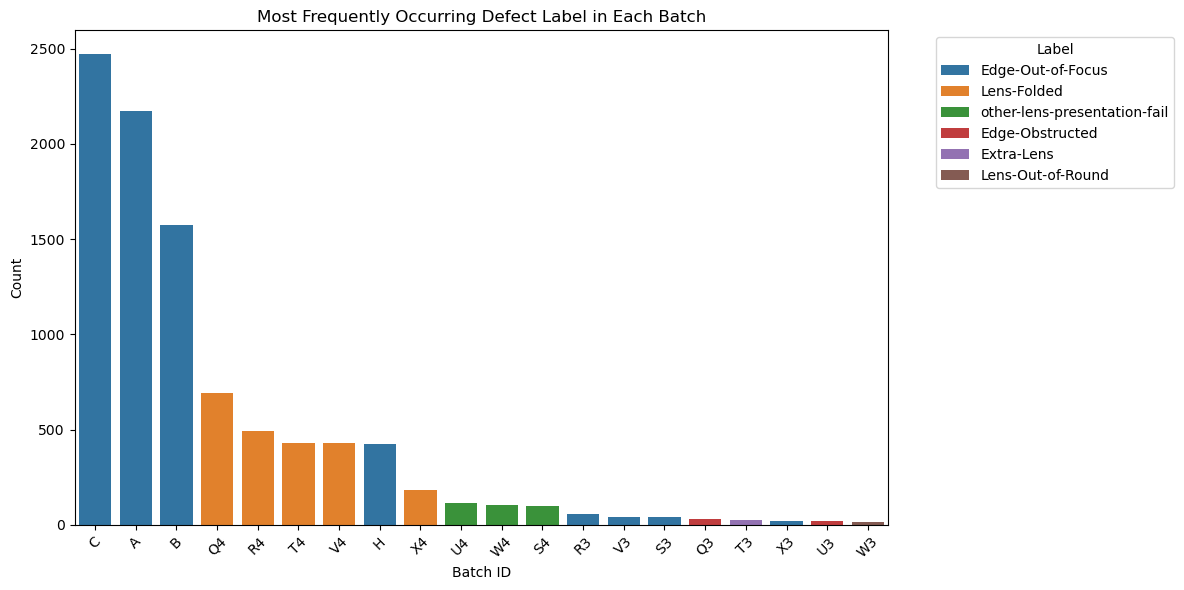

In [12]:

label_counts = unique_df.groupby(['batch_id', 'label']).size().reset_index(name='count')


most_common_labels = label_counts.sort_values('count', ascending=False).drop_duplicates('batch_id')


plt.figure(figsize=(12, 6))
sns.barplot(data=most_common_labels, x='batch_id', y='count', hue='label', dodge=False)
plt.title("Most Frequently Occurring Defect Label in Each Batch")
plt.xlabel('Batch ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


This graph shows the most common defect label for each batch, based on the number of unique images affected. The y-axis represents how many unique images in each batch have the top defect label, helping to quickly identify the dominant defect type within each batch.

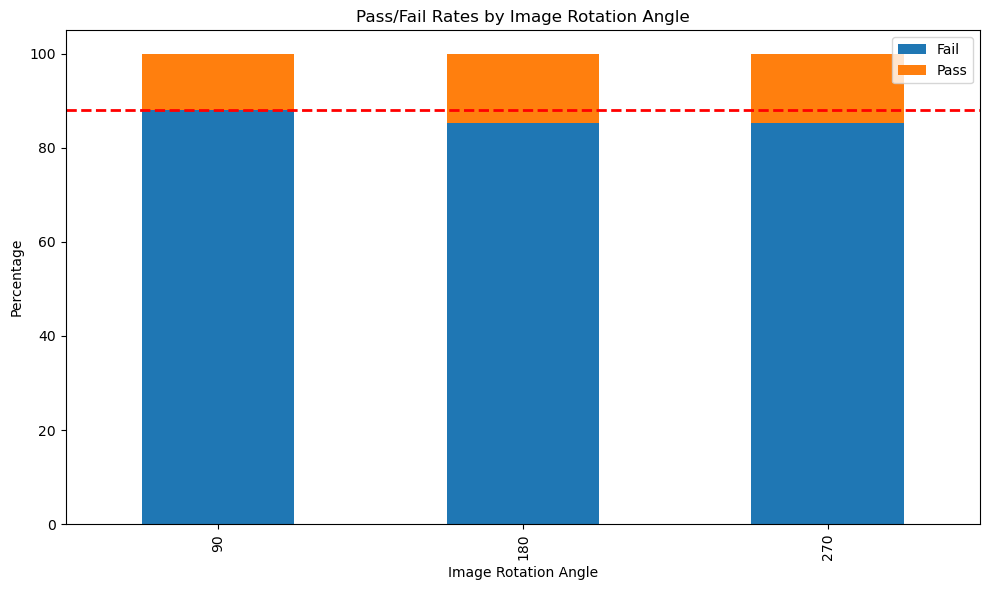

In [13]:

df['rotation'] = df['image'].str.extract(r'RT(\d+)').astype(float)


df_with_rotation = df.dropna(subset=['rotation']).copy()


df_with_rotation['rotation'] = df_with_rotation['rotation'].astype(int)


rotation_passfail = df_with_rotation.groupby(['rotation', 'pass_fail']).size().unstack(fill_value=0)


rotation_pct = rotation_passfail.div(rotation_passfail.sum(axis=1), axis=0) * 100


ax = rotation_pct.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Pass/Fail Rates by Image Rotation Angle")
plt.xlabel("Image Rotation Angle")
plt.ylabel("Percentage")


fail_pct_90 = rotation_pct.loc[90, 'Fail']
ax.axhline(y=fail_pct_90, color='red', linestyle='dashed', linewidth=2)

plt.legend()
plt.tight_layout()
plt.show()


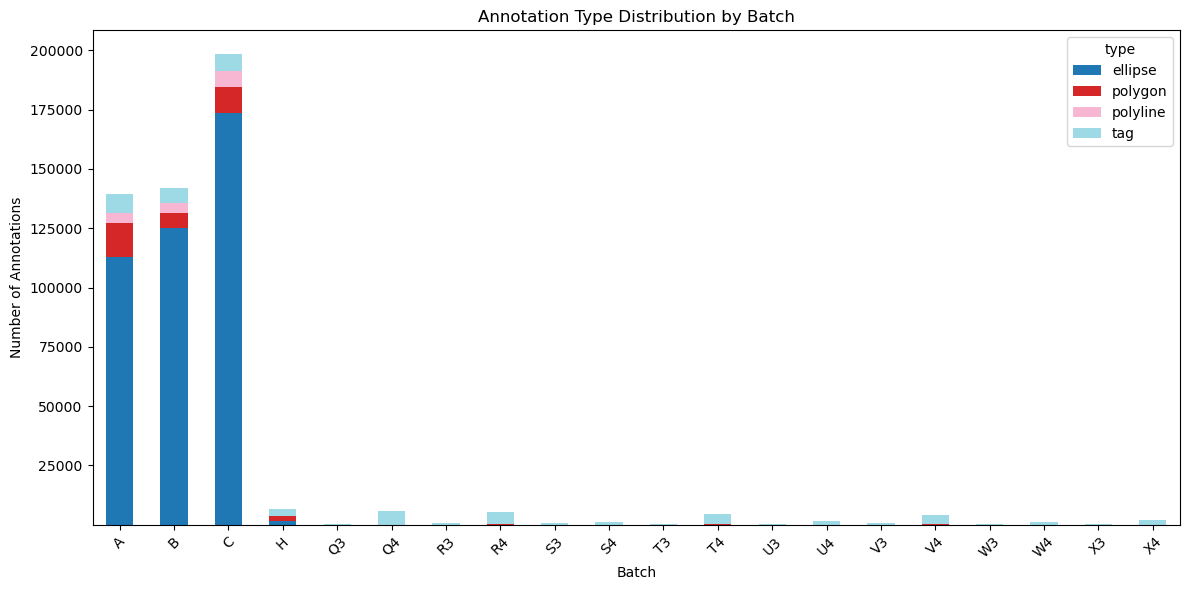

In [23]:
type_counts = df.groupby(['batch_id', 'type']).size().unstack(fill_value=0)

# Plot
type_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Annotation Type Distribution by Batch")
plt.ylabel("Number of Annotations")
plt.xlabel("Batch")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

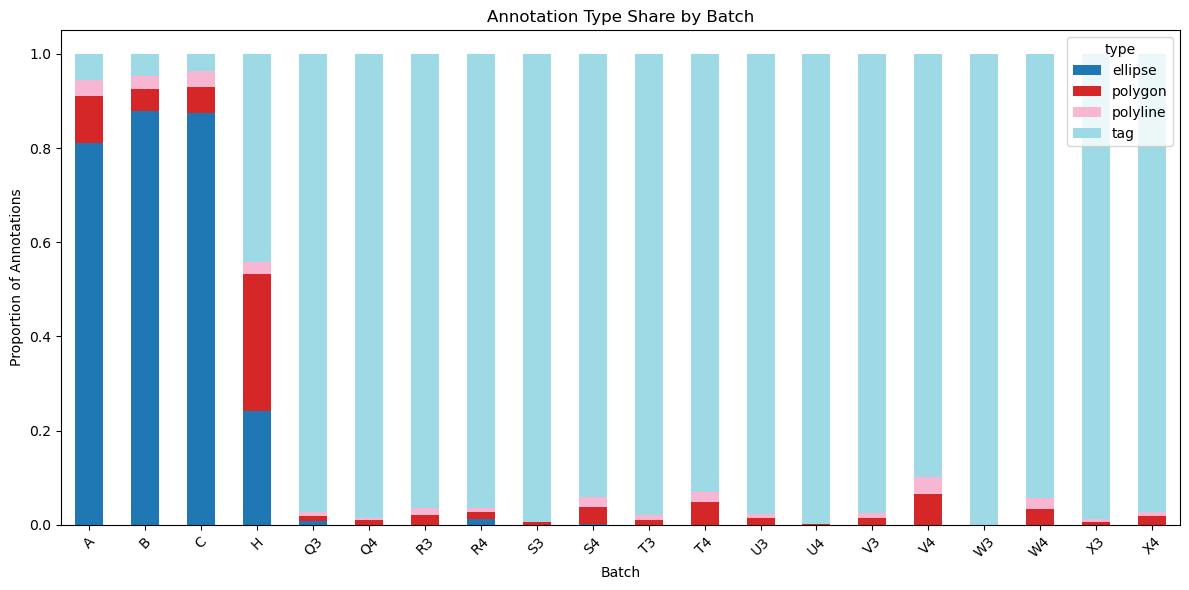

In [24]:
type_percentage = type_counts.div(type_counts.sum(axis=1), axis=0)

type_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Annotation Type Share by Batch")
plt.ylabel("Proportion of Annotations")
plt.xlabel("Batch")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


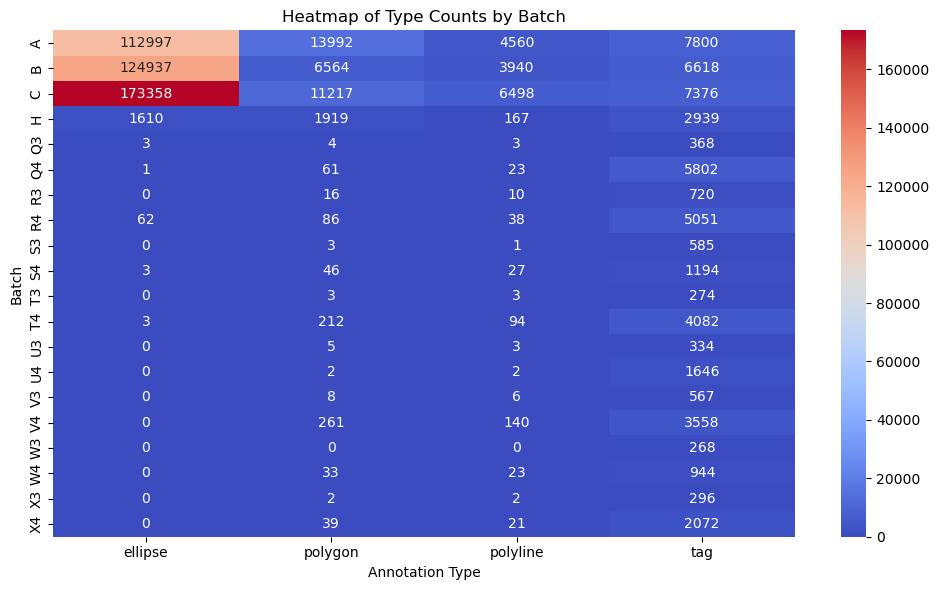

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(type_counts, annot=True, fmt='d', cmap='coolwarm')
plt.title("Heatmap of Type Counts by Batch")
plt.ylabel("Batch")
plt.xlabel("Annotation Type")
plt.tight_layout()
plt.show()

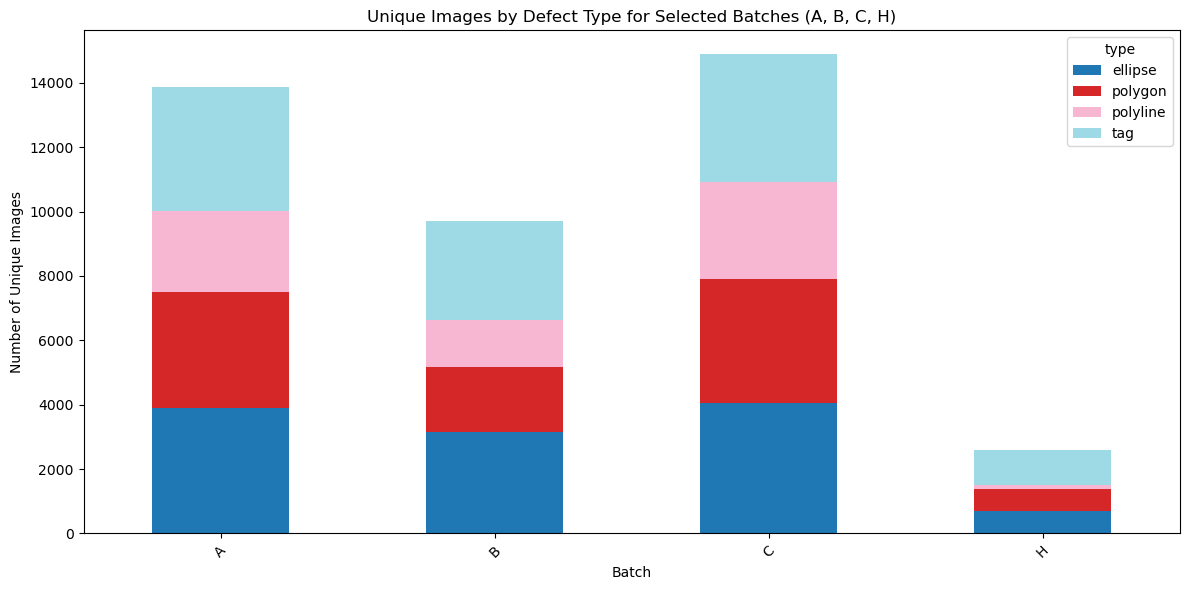

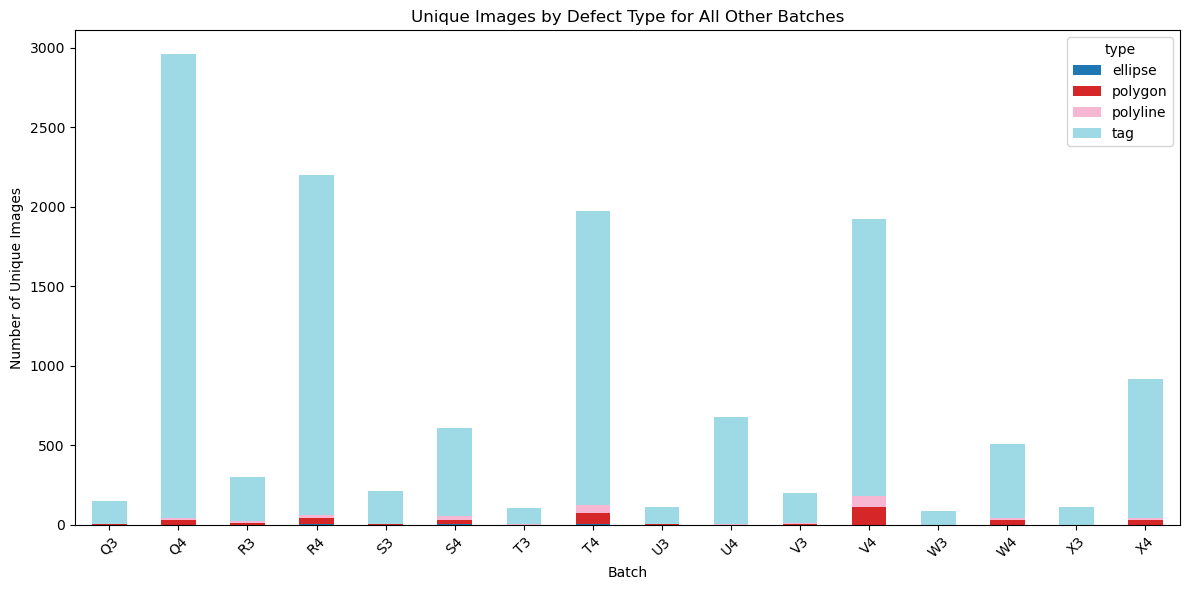

In [17]:
extreme_batches = ['A', 'B', 'C', 'H']


if 'batch_id' not in df.columns:
    df['batch_id'] = df['image'].str.extract(r'^([^/]+)/')

unique_defect_images = df.drop_duplicates(subset=['image', 'type']).copy()

extreme_df = unique_defect_images[unique_defect_images['batch_id'].isin(extreme_batches)]
other_df = unique_defect_images[~unique_defect_images['batch_id'].isin(extreme_batches)]


type_counts_extreme = extreme_df.groupby(['batch_id', 'type']).size().unstack(fill_value=0)
type_counts_extreme.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("Unique Images by Defect Type for Selected Batches (A, B, C, H)")
plt.ylabel("Number of Unique Images")
plt.xlabel("Batch")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


type_counts_other = other_df.groupby(['batch_id', 'type']).size().unstack(fill_value=0)
type_counts_other.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("Unique Images by Defect Type for All Other Batches")
plt.ylabel("Number of Unique Images")
plt.xlabel("Batch")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We created two charts to make the data easier to analyze: one shows defect distributions for batches A, B, C, and H (the extremes), and the other shows the rest of the batches.
This separation helps us focus on the outliers without losing sight of the overall trends.

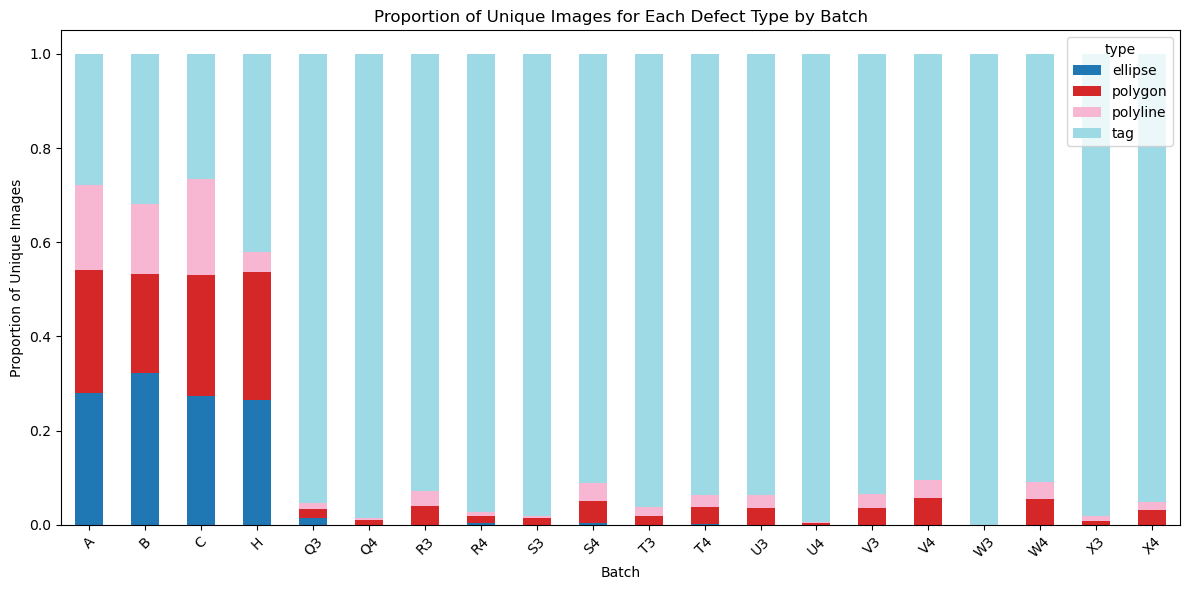

In [18]:

unique_defect_images = df.drop_duplicates(subset=['image', 'type']).copy()


unique_defect_images['batch_id'] = unique_defect_images['image'].str.extract(r'^([^/]+)/')

type_counts = unique_defect_images.groupby(['batch_id', 'type']).size().unstack(fill_value=0)


type_percentage = type_counts.div(type_counts.sum(axis=1), axis=0)


type_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Proportion of Unique Images for Each Defect Type by Batch")
plt.ylabel("Proportion of Unique Images")
plt.xlabel("Batch")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


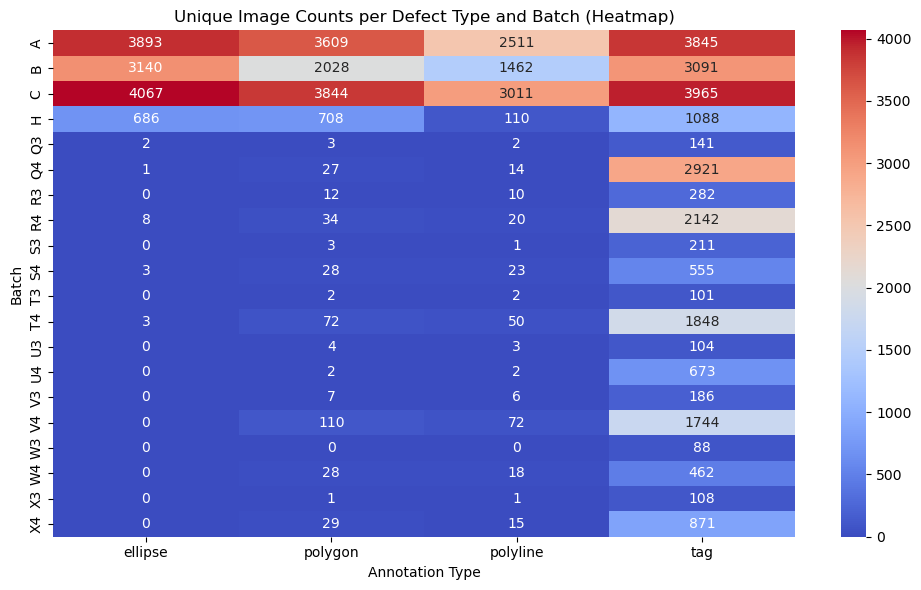

In [19]:


type_counts = unique_defect_images.groupby(['batch_id', 'type']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(type_counts, annot=True, fmt='d', cmap='coolwarm')
plt.title("Unique Image Counts per Defect Type and Batch (Heatmap)")
plt.ylabel("Batch")
plt.xlabel("Annotation Type")
plt.tight_layout()
plt.show()


In [20]:

type_counts = unique_defect_images.groupby(['batch_id', 'type']).size().unstack(fill_value=0)

unique_images_per_batch = unique_defect_images.groupby('batch_id')['image'].nunique()


summary_df = type_counts.copy()
summary_df['Total Unique Images'] = unique_images_per_batch

print(summary_df)





type      ellipse  polygon  polyline   tag  Total Unique Images
batch_id                                                       
A            3893     3609      2511  3845                 3893
B            3140     2028      1462  3091                 3140
C            4067     3844      3011  3965                 4067
H             686      708       110  1088                 1088
Q3              2        3         2   141                  141
Q4              1       27        14  2921                 2924
R3              0       12        10   282                  282
R4              8       34        20  2142                 2146
S3              0        3         1   211                  211
S4              3       28        23   555                  556
T3              0        2         2   101                  101
T4              3       72        50  1848                 1855
U3              0        4         3   104                  104
U4              0        2         2   6

Tag vs non tag graph

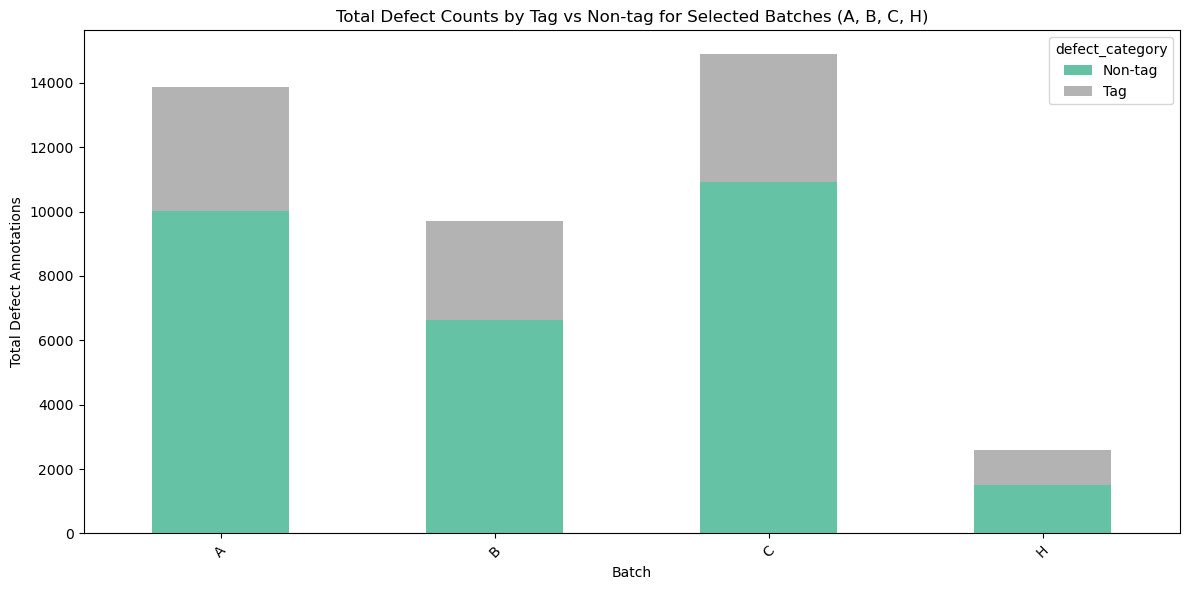

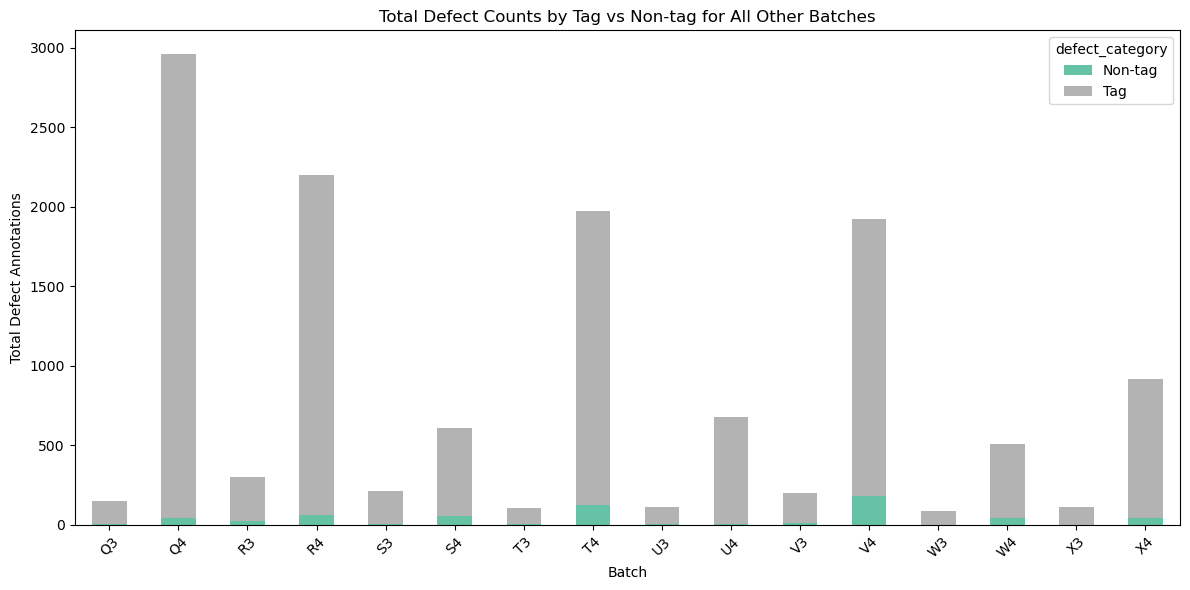

In [21]:

non_tag_types = ['ellipse', 'polygon', 'polyline']
extreme_batches = ['A', 'B', 'C', 'H']


unique_defect_images = df.drop_duplicates(subset=['image', 'type']).copy()


unique_defect_images['defect_category'] = unique_defect_images['type'].apply(
    lambda x: 'Non-tag' if x in non_tag_types else 'Tag'
)


extreme_df = unique_defect_images[unique_defect_images['batch_id'].isin(extreme_batches)]
category_counts_extreme = extreme_df.groupby(['batch_id', 'defect_category']).size().unstack(fill_value=0)

category_counts_extreme.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title("Total Defect Counts by Tag vs Non-tag for Selected Batches (A, B, C, H)")
plt.ylabel("Total Defect Annotations")
plt.xlabel("Batch")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Other batches
other_df = unique_defect_images[~unique_defect_images['batch_id'].isin(extreme_batches)]
category_counts_other = other_df.groupby(['batch_id', 'defect_category']).size().unstack(fill_value=0)

category_counts_other.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title("Total Defect Counts by Tag vs Non-tag for All Other Batches")
plt.ylabel("Total Defect Annotations")
plt.xlabel("Batch")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This analysis counts the total number of defect annotations (including multiple defects per image) grouped by defect category — Tag vs Non-tag — across different batches.

In [22]:

category_counts = unique_defect_images.groupby(['batch_id', 'defect_category']).size().unstack(fill_value=0)


category_percentages = category_counts.div(category_counts.sum(axis=1), axis=0) * 100


summary_table = pd.concat([
    category_counts.add_suffix(' Count'),
    category_percentages.round(2).add_suffix(' %')
], axis=1)

print(summary_table)


defect_category  Non-tag Count  Tag Count  Non-tag %   Tag %
batch_id                                                    
A                        10013       3845      72.25   27.75
B                         6630       3091      68.20   31.80
C                        10922       3965      73.37   26.63
H                         1504       1088      58.02   41.98
Q3                           7        141       4.73   95.27
Q4                          42       2921       1.42   98.58
R3                          22        282       7.24   92.76
R4                          62       2142       2.81   97.19
S3                           4        211       1.86   98.14
S4                          54        555       8.87   91.13
T3                           4        101       3.81   96.19
T4                         125       1848       6.34   93.66
U3                           7        104       6.31   93.69
U4                           4        673       0.59   99.41
V3                      